<a href="https://colab.research.google.com/github/SubhadipGhosh07/Netflix-Movies-Recommender-System/blob/main/Netflix_Movies_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Building a Content-Based Recommendation System of Netflix Titles </b>

**Dataset Source:** Kaggle


We will not be describing every feature, we will be discussing only the important ones.
The features we have are as follows:
* <b>Title:</b> Name/Title of the Movies
* <b>Genres:</b> Genre of the Movies
* <b>Tags:</b> A brief description of the Genres
* <b>Languages:</b> Language of the Movies
* <b>Ratings:</b>This dataset combines data sources from Netflix, Rotten Tomatoes, IMBD, posters, box office information, trailers on YouTube
* <b>Summary:</b> A basic summary of the movies
* <b>Directors, Writers and Actors:</b> Names of cast and crew members  of the movie


In [164]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances
import scipy.spatial.distance

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
# /Importing our dataset
pd.set_option('display.max_columns', None)
df=pd.read_csv("/content/drive/MyDrive/Movie Recommender System/netflix-rotten-tomatoes-metacritic-imdb.csv")
df.head(3)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror Programmes,Thai TV Programmes","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, Henrik Dahl",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,"A med student with a supernatural gift tries to cash in on his abilities by facing off against ghosts, till a wandering spirit brings romance inst...",205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/evlCitJPPCVCry0BZlEFb5-QjKc/AAAABcmgLCxN8dNahdY2kgd1hhcL2a6XrE92x24Bx5h6JFUvH5zMrv6lFWl_aWMt33b6DHvk...,https://m.media-amazon.com/images/M/MV5BOWM4NTY2NTMtZDZlZS00NTgyLWEzZDMtODE3ZGI1MzI3ZmU5XkEyXkFqcGdeQXVyNzI1NzMxNzM@._V1_SX300.jpg,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal Finn",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get out of hand when she reinvents herself as a bad-mouthed music critic to save her poverty-stricken f...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6/evlCitJPPCVCry0BZlEFb5-QjKc/AAAABe_fxMSBM1E-sSoszr12SmkI-498sqBWrEyhkchdn4UklQVjdoPS_Hj-NhvgbePvwlD...,https://m.media-amazon.com/images/M/MV5BZGUyN2ZlMjYtZTk2Yy00MWZiLWIyMDktMzFlMmEzOWVlMGNiXkEyXkFqcGdeQXVyMTE1MzI2NzIz._V1_SX300.jpg,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a pregnant woman and her husband fight to survive while the temperatures plummet. Inspired by a true st...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6/evlCitJPPCVCry0BZlEFb5-QjKc/AAAABW-fG-2_s3pGsBdbw4nLCWENcRKL2Ngj7Kv5_QQVgZ--GT8eg-BlyJZM9ZaAg5kAYHe...,https://m.media-amazon.com/images/M/MV5BODM2MDQ5MjktYTM1ZS00Y2M4LTg0MDAtZjFjZDM1MDQxZGRmXkEyXkFqcGdeQXVyNDA1NDA2NTk@._V1_SX300.jpg,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube


In [166]:
# Number of records and features we have
print("Number of records: {}".format(df.shape[0]))
print("Number of features: {}".format(df.shape[1]))

Number of records: 15480
Number of features: 29


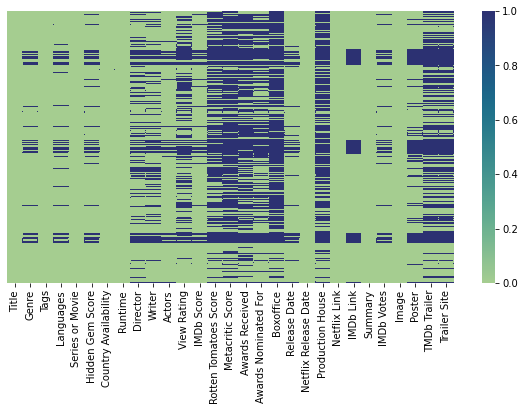

In [90]:
# Checking distribution of null values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False, cmap='crest')

In [91]:
# Info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [92]:
# Missing data imputation
ratings = df[['IMDb Score','Rotten Tomatoes Score','Metacritic Score','Awards Nominated For','Hidden Gem Score',
             'IMDb Votes']]
ratings.head()

,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Nominated For,Hidden Gem Score,IMDb Votes
0,7.9,98.0,82.0,57.0,4.3,205926.0
1,5.8,79.0,69.0,NaN,7.0,2838.0
2,4.3,NaN,46.0,NaN,6.4,1720.0
3,6.5,NaN,NaN,NaN,7.7,1147.0
4,6.3,NaN,NaN,4.0,8.1,63.0


## <b> Substituting missing values under Scoring section using KNN Imputer:</b>
* We will not be using ratings in the content based recommendation model
* We will be using the final ratings to subset our dataset

In [93]:
# Checking info on ratings
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IMDb Score             13381 non-null  float64
 1   Rotten Tomatoes Score  6382 non-null   float64
 2   Metacritic Score       4336 non-null   float64
 3   Awards Nominated For   7661 non-null   float64
 4   Hidden Gem Score       13379 non-null  float64
 5   IMDb Votes             13379 non-null  float64
dtypes: float64(6)
memory usage: 725.8 KB


In [94]:
# Scaling these features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
ratings=pd.DataFrame(scaler.fit_transform(ratings), columns=ratings.columns)
ratings.head()

,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Nominated For,Hidden Gem Score,IMDb Votes
0,0.793103,0.98,0.810526,0.145455,0.402174,0.087470
1,0.551724,0.79,0.673684,NaN,0.695652,0.001203
2,0.379310,NaN,0.431579,NaN,0.630435,0.000728
3,0.632184,NaN,NaN,NaN,0.771739,0.000485
4,0.609195,NaN,NaN,0.007792,0.815217,0.000025


In [95]:
#Number of null values we have in total
ratings.isnull().sum()

IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Nominated For      7819
Hidden Gem Score          2101
IMDb Votes                2101
dtype: int64

In [96]:
# Missing value imputation using Knn
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV
imputer = KNNImputer(n_neighbors=5)
ratings=pd.DataFrame(imputer.fit_transform(ratings),columns=ratings.columns)

In [97]:
# Calculating final ratings by assigning weights
ratings['final_ratings'] = 0.4*((ratings['IMDb Score']+ratings['Rotten Tomatoes Score']+ratings['Metacritic Score']+ratings['Hidden Gem Score'])/4) + 0.4*ratings['Awards Nominated For'] + 0.2*ratings['IMDb Votes'] 

In [98]:
# Final ratings after imputing mising values
ratings.head()

,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Nominated For,Hidden Gem Score,IMDb Votes,final_ratings
0,0.793103,0.980,0.810526,0.145455,0.402174,0.087470,0.374256
1,0.551724,0.790,0.673684,0.004156,0.695652,0.001203,0.273009
2,0.379310,0.228,0.431579,0.005195,0.630435,0.000728,0.169156
3,0.632184,0.670,0.705263,0.008831,0.771739,0.000485,0.281548
4,0.609195,0.714,0.646316,0.007792,0.815217,0.000025,0.281595


In [99]:
# Adding the final ratings to the parent dataset
df['final_ratings']=ratings['final_ratings']
df.head(3)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,final_ratings
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror Programmes,Thai TV Programmes","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, Henrik Dahl",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries to cash in on his abilities by facing off against g...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/evlCitJPPCVCry0BZlEFb5-QjKc/AAAABcmgLCxN8dNahdY2kg...,https://m.media-amazon.com/images/M/MV5BOWM4NTY2NTMtZDZlZS00NTgyLWEzZDMtODE3ZGI1MzI3ZmU5XkEyXkFq...,NaN,NaN,0.374256
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal Finn",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get out of hand when she reinvents herself as a bad-m...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6/evlCitJPPCVCry0BZlEFb5-QjKc/AAAABe_fxMSBM1E-sSosz...,https://m.media-amazon.com/images/M/MV5BZGUyN2ZlMjYtZTk2Yy00MWZiLWIyMDktMzFlMmEzOWVlMGNiXkEyXkFq...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube,0.273009
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a pregnant woman and her husband fight to survive whi...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6/evlCitJPPCVCry0BZlEFb5-QjKc/AAAABW-fG-2_s3pGsBdbw...,https://m.media-amazon.com/images/M/MV5BODM2MDQ5MjktYTM1ZS00Y2M4LTg0MDAtZjFjZDM1MDQxZGRmXkEyXkFq...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube,0.169156


## <b> Plotting final ratings:</b>
* We will be using only those movies having final-ratings above a particular threshold

Text(0.5, 1.0, 'Distribution of ratings')

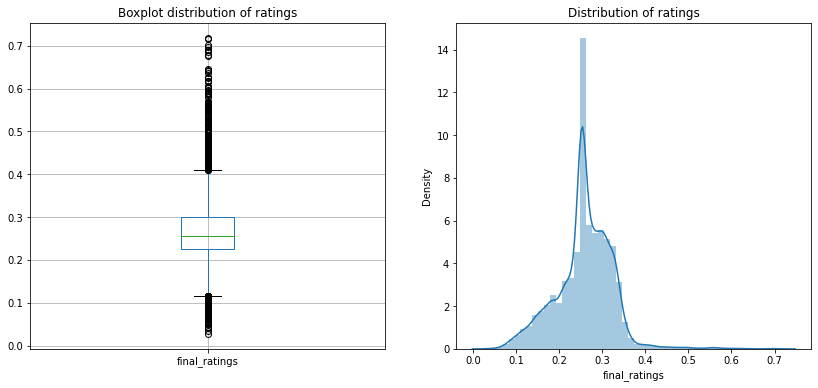

In [100]:
# Plotting final ratings
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df.boxplot('final_ratings')
plt.title("Boxplot distribution of ratings")

plt.subplot(1,2,2)
sns.distplot(df['final_ratings'])
plt.title("Distribution of ratings")

<b>Conclusion:</b>
As the box plot and the distribution plot tells us that there are few outliers, we will be subsetting our dataset and only consider those movies having final ratings above 0.1

In [101]:
# Selecting only those movies having rating more than 0.1
df=df[df['final_ratings']>0.1]

## <b>Subsetting Contents of our Movies:</b>
* The features will be used in our recommender system
* We will use Genres, Languages, Director, Writer, Actors and Summary of the movies as contents
* Majority of the values in 'Genres' are null, which can be replaced by the corresponding values in the 'Tags' feature 

In [102]:
# Choosing contents of our movies
data=df[['Title','Genre','Tags','Languages','Director','Writer','Actors','Summary']]
data.head()

,Title,Genre,Tags,Languages,Director,Writer,Actors,Summary
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror Programmes,Thai TV Programmes","Swedish, Spanish",Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, Henrik Dahl",A med student with a supernatural gift tries to cash in on his abilities by facing off against g...
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal Finn","When nerdy Johanna moves to London, things get out of hand when she reinvents herself as a bad-m..."
2,Centigrade,"Drama, Thriller",Thrillers,English,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza","Trapped in a frozen car during a blizzard, a pregnant woman and her husband fight to survive whi..."
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Beren Gokyildiz","Upon moving into a new place, a 20-something runs into a former flame that triggers memories of ..."
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedies,Movies Based on Books",English,Stephen Irwin,NaN,Ragga Gudrun,"Inspired by her moms rebellious past and a confident new friend, a shy 16-year-old publishes an ..."


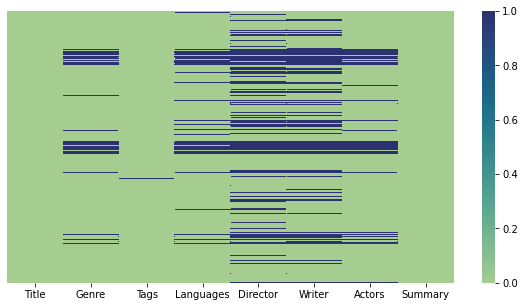

In [103]:
# checking null values
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),yticklabels=False, cmap='crest')

In [104]:
# Null vallues counts
data.isnull().sum()

Title           0
Genre        1710
Tags           66
Languages    1935
Director     4706
Writer       4328
Actors       1925
Summary         9
dtype: int64

## <b>Working with the 'Genre' feature:</b>
* We will extract the unique genres in our dataset
* Majority of the values in 'Genre' are null, so the value in 'Tags' column can be substituted in their place
* Before that, we need proper pre-processing to do in the Tags column  

In [105]:
# Resetting index
data.reset_index(inplace=True)
data.drop('index',axis=1, inplace=True)

In [106]:
# Creating a dataset with no null values in genres
genre_no_na=data[data['Genre'].isnull()==False]
genre_no_na.reset_index(inplace=True)
genre_no_na.drop('index',axis=1,inplace=True)


# let's get the unique genres
genres=[]
for i in range(len(genre_no_na)):
    if ',' not in genre_no_na.loc[i, 'Genre']:
        genres.append(genre_no_na.loc[i, 'Genre'])
    
    else:
        genre = genre_no_na.loc[i, 'Genre'].split(',')
        for ii in genre:
            genres.append(ii)

            
# List of genres by removing spaces in front of string
genres_upd=[]
for i in range(len(genres)):
    for j in genres[i].split():
        genres_upd.append(j)

In [107]:
# replacing the null values in Tags by genres
data.loc[data['Tags'].isnull(), 'Tags'] = data.loc[data['Tags'].isnull(), 'Genre']
data.dropna(subset=['Tags'],axis=0,inplace=True)

In [108]:
data.isnull().sum()

Title           0
Genre        1698
Tags            0
Languages    1923
Director     4694
Writer       4316
Actors       1913
Summary         9
dtype: int64

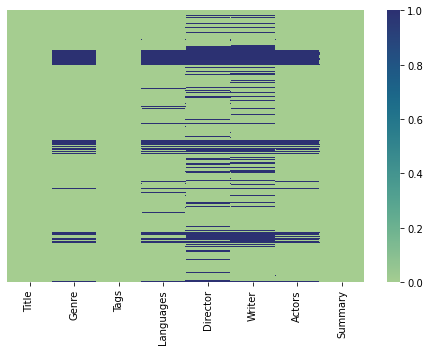

In [109]:
# Checking null values via heatmap
plt.figure(figsize=(8,5))
sns.heatmap(data.isnull(), yticklabels=False, cmap='crest')

<b>Conclusion:</b>
The dark grids in the above plot shows that some of the movies dont have the names of the Directors, Writers and Actors. We will remove those values corresponding to Directors and Writers, and substitute the Nan values of Actors as 'Unknown Actors' 

In [110]:
# Dropping Nan values:
data.dropna(subset=['Director','Writer'],axis=0,inplace=True)
# Checking number of null values
data.isnull().sum()

Title          0
Genre         29
Tags           0
Languages    103
Director       0
Writer         0
Actors        87
Summary        6
dtype: int64

In [111]:
# Info of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9912 entries, 0 to 15273
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      9912 non-null   object
 1   Genre      9883 non-null   object
 2   Tags       9912 non-null   object
 3   Languages  9809 non-null   object
 4   Director   9912 non-null   object
 5   Writer     9912 non-null   object
 6   Actors     9825 non-null   object
 7   Summary    9906 non-null   object
dtypes: object(8)
memory usage: 696.9+ KB


## <b> Substituting None values in 'Genre' by values in 'Tags':</b>
* Removing tokens in tags column that does not match with the values in the genres list we created before
* Preprocessing the tags column
* Using Lemmatization to convert the tokens in Tags into their base form

In [112]:
# Importing nltk libraries
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [113]:
# downloading Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [114]:
# Adding the word TV to stopwords
stop = stopwords.words("english")
stop.append("TV")

In [115]:
# Preprocessing of our 'Tags' feature
# Creating a function that can process the tags column
lm = WordNetLemmatizer()
def word_lemmas(tags):
    tags=re.sub("[^a-zA-Z]",' ',tags)
    clean= ' '.join([lm.lemmatize(word) for word in tags.split() if word not in stop])
    text_blob_object = TextBlob(clean)
    b = [text_blob_object.words[i].singularize() for i in range(len(clean.split()))]
    return ' '.join(b)

In [116]:
# Downloading wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [117]:
# Downloading punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [118]:
# Applying the function to our Tags column
data['Tags_cleaned']=data['Tags'].apply(word_lemmas)

In [119]:
# Reseting index
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [120]:
# Updated Dataset
data.head(3)

,Title,Genre,Tags,Languages,Director,Writer,Actors,Summary,Tags_cleaned
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror Programmes,Thai TV Programmes","Swedish, Spanish",Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, Henrik Dahl",A med student with a supernatural gift tries to cash in on his abilities by facing off against g...,Comedy Programme Romantic Comedy Horror Programme Thai Programme
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal Finn","When nerdy Johanna moves to London, things get out of hand when she reinvents herself as a bad-m...",Drama Comedy Film Based Book British
2,Centigrade,"Drama, Thriller",Thrillers,English,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza","Trapped in a frozen car during a blizzard, a pregnant woman and her husband fight to survive whi...",Thriller


In [121]:
# Storing genres in a separate dataset
# Only using those tokens in 'Tags' that are in the genres list we created before

upd_genre_df=pd.DataFrame(columns=['Upd_genres'])
for i in range(len(data)):
    genre_tags=[]
    if ' ' not in data.loc[i,'Tags_cleaned']:
        tag = data.loc[i,'Tags_cleaned']
        if tag not in set(genres_upd):
            genre_tags.append(tag)
        else:
            idx=genres_upd.index(tag)
            genre_tags.append(genres_upd[idx])
            
    else:
        tag = data.loc[i,'Tags_cleaned'].split()
        for ii in tag:
            if ii in genres_upd:
                idx=genres_upd.index(ii)
                genre_tags.append(genres_upd[idx])
                
    upd_genre_df.loc[i,'Upd_genres']=set(genre_tags)

In [122]:
# Our genres dataset
df1=upd_genre_df.copy()
df1['Upd_genres']=df1['Upd_genres'].apply(lambda x: ",".join(x))
df1.head()

,Upd_genres
0,"Horror,Comedy"
1,"Drama,Comedy"
2,Thriller
3,Comedy
4,Drama


## <b>Working with the cast and crew features:</b>
* Separated the Actors, Directors and Writers and stored them in a separate dataset
* Need to convert the names of cast and crew members in a single word by removing spaces such that they get treated as a single word while using Feature Vectorization in the later stages
* Replacing spaces by underscore
* For more than one cast and crew member for a film, we need to remove spaces before starting of their name

In [123]:
# Creating a cast-crew dataset
cast_crew_df=data[['Director','Writer','Actors']]
cast_crew_df.head()

,Director,Writer,Actors
0,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, Henrik Dahl"
1,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal Finn"
2,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza"
3,Mez Tharatorn,"Pattaranad Bhiboonsawade, Thodsapon Thiptinnakorn, Mez Tharatorn","Thiti Mahayotaruk, Nadech Kugimiya, Kathaleeya McIntosh, Pimchanok Leuwisetpaiboon"
4,Alf Sjöberg,Ivar Lo-Johansson,"Ulf Palme, Ragnar Falck, Hugo Björne, Eva Dahlbeck"


In [124]:
# Null values
cast_crew_df.isnull().sum()

Director     0
Writer       0
Actors      87
dtype: int64

In [125]:
# Substituting nan values of actors as Unknown actors
cast_crew_df.loc[cast_crew_df['Actors'].isnull(), 'Actors'] = 'Unknown_actors'

In [126]:
cast_crew_df.head()

,Director,Writer,Actors
0,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, Henrik Dahl"
1,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal Finn"
2,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza"
3,Mez Tharatorn,"Pattaranad Bhiboonsawade, Thodsapon Thiptinnakorn, Mez Tharatorn","Thiti Mahayotaruk, Nadech Kugimiya, Kathaleeya McIntosh, Pimchanok Leuwisetpaiboon"
4,Alf Sjöberg,Ivar Lo-Johansson,"Ulf Palme, Ragnar Falck, Hugo Björne, Eva Dahlbeck"


In [127]:
# This for loop will remove any spaces at the starting of the names of cast and crew members
# It will also replace spaces between names into underscores

# Actors list
actors_list=[]
for i in range(len(cast_crew_df)):
    cast=[]
    if ',' in cast_crew_df.loc[i,'Actors']:
        a=cast_crew_df.loc[i,'Actors'].split(',')
        for ii in a:
            store=ii.lstrip().replace(' ','_')
            cast.append(store)
    else:
        try:
            store_ = cast_crew_df.loc[i,'Actors'].replace(' ','_')
            cast.append(store_)
        except:
            cast.append(cast_crew_df.loc[i,'Actors'])

    actors_list.append(cast)
    
    
# Creating a list for writers
writers=[]
for i in range(len(cast_crew_df)):
    writers_list=[]
    if ',' in cast_crew_df.loc[i,'Writer']:
        a=cast_crew_df.loc[i,'Writer'].split(',')
        for ii in a:
            store=ii.lstrip().replace(' ','_')
            writers_list.append(store)
    else:
        try:
            store_ = cast_crew_df.loc[i,'Writer'].replace(' ','_')
            writers_list.append(store_)
        except:
            writers_list.append(cast_crew_df.loc[i,'Writer'])

    writers.append(writers_list)
    
    
# Creating a list for Director
directors=[]
for i in range(len(cast_crew_df)):
    dir_list=[]
    if ',' in cast_crew_df.loc[i,'Director']:
        a=cast_crew_df.loc[i,'Director'].split(',')
        for ii in a:
            store=ii.lstrip().replace(' ','_')
            dir_list.append(store)
    else:
        try:
            store_ = cast_crew_df.loc[i,'Director'].replace(' ','_')
            dir_list.append(store_)
        except:
            dir_list.append(cast_crew_df.loc[i,'Director'])

    directors.append(dir_list)

In [128]:
# Updating our dataset
cast_crew_df['Director']=directors
cast_crew_df['Writer']=writers
cast_crew_df['Actors']=actors_list

# Storing in string format
cast_crew_df['Director'] = cast_crew_df['Director'].apply(lambda x: ','.join(x))
cast_crew_df['Writer'] = cast_crew_df['Writer'].apply(lambda x: ','.join(x))
cast_crew_df['Actors'] = cast_crew_df['Actors'].apply(lambda x: ','.join(x))

In [129]:
# Updated Dataset
cast_crew_df.head()

,Director,Writer,Actors
0,Tomas_Alfredson,John_Ajvide_Lindqvist,"Kåre_Hedebrant,Per_Ragnar,Lina_Leandersson,Henrik_Dahl"
1,Coky_Giedroyc,Caitlin_Moran,"Paddy_Considine,Cleo,Beanie_Feldstein,Dónal_Finn"
2,Brendan_Walsh,"Brendan_Walsh,Daley_Nixon","Genesis_Rodriguez,Vincent_Piazza"
3,Mez_Tharatorn,"Pattaranad_Bhiboonsawade,Thodsapon_Thiptinnakorn,Mez_Tharatorn","Thiti_Mahayotaruk,Nadech_Kugimiya,Kathaleeya_McIntosh,Pimchanok_Leuwisetpaiboon"
4,Alf_Sjöberg,Ivar_Lo-Johansson,"Ulf_Palme,Ragnar_Falck,Hugo_Björne,Eva_Dahlbeck"


In [130]:
# Updating the dataset by merging genres, summary and titles of movies
cast_crew_df['genres']=df1['Upd_genres']
cast_crew_df['Summary']=data['Summary']
cast_crew_df['Title']=data['Title']

In [131]:
cast_crew_df.head()

,Director,Writer,Actors,genres,Summary,Title
0,Tomas_Alfredson,John_Ajvide_Lindqvist,"Kåre_Hedebrant,Per_Ragnar,Lina_Leandersson,Henrik_Dahl","Horror,Comedy",A med student with a supernatural gift tries to cash in on his abilities by facing off against g...,Lets Fight Ghost
1,Coky_Giedroyc,Caitlin_Moran,"Paddy_Considine,Cleo,Beanie_Feldstein,Dónal_Finn","Drama,Comedy","When nerdy Johanna moves to London, things get out of hand when she reinvents herself as a bad-m...",HOW TO BUILD A GIRL
2,Brendan_Walsh,"Brendan_Walsh,Daley_Nixon","Genesis_Rodriguez,Vincent_Piazza",Thriller,"Trapped in a frozen car during a blizzard, a pregnant woman and her husband fight to survive whi...",Centigrade
3,Mez_Tharatorn,"Pattaranad_Bhiboonsawade,Thodsapon_Thiptinnakorn,Mez_Tharatorn","Thiti_Mahayotaruk,Nadech_Kugimiya,Kathaleeya_McIntosh,Pimchanok_Leuwisetpaiboon",Comedy,"After her ex-boyfriend cons her out of a large sum of money, a former bank employee tricks a sca...",The Con-Heartist
4,Alf_Sjöberg,Ivar_Lo-Johansson,"Ulf_Palme,Ragnar_Falck,Hugo_Björne,Eva_Dahlbeck",Drama,An unhappily married farm worker struggling to care for her children reflects on her lost youth ...,Only a Mother


In [132]:
# Number of duplicate records
cast_crew_df.duplicated(subset=['Title']).sum()

234

In [133]:
# Removing duplicate records
cast_crew_df.drop_duplicates(subset=['Title'],keep='first',inplace=True)

In [134]:
# Info after removing duplicate records
cast_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9678 entries, 0 to 9911
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Director  9678 non-null   object
 1   Writer    9678 non-null   object
 2   Actors    9678 non-null   object
 3   genres    9678 non-null   object
 4   Summary   9672 non-null   object
 5   Title     9678 non-null   object
dtypes: object(6)
memory usage: 529.3+ KB


In [135]:
# Checking for null values
cast_crew_df.isnull().sum()

Director    0
Writer      0
Actors      0
genres      0
Summary     6
Title       0
dtype: int64

In [136]:
# Columns where we have null summaries
cast_crew_df[cast_crew_df['Summary'].isnull()==True]

,Director,Writer,Actors,genres,Summary,Title
588,Tommy_Wiseau,Tommy_Wiseau,"Philip_Haldiman,Tommy_Wiseau,Juliette_Danielle,Greg_Sestero","Drama,Comedy",NaN,The Room
634,Emilio_Graziani-Walter,Emilio_Graziani-Walter,"Tilde_Teldi,Emilio_Graziani-Walter",Drama,NaN,Primo amore
635,Emanuele_Crialese,Emanuele_Crialese,"Valeria_Golino,Francesco_Casisa,Vincenzo_Amato,Veronica_D'Agostino","Drama,Comedy",NaN,Respiro
686,Mike_Figgis,"Michael_Cristofer,Eric_Roth","Lena_Olin,Tom_Irwin,Anne_Bancroft,Richard_Gere",Drama,NaN,Mr. Jones
688,Jacques_Audiard,"Patrick_DeWitt,Thomas_Bidegain,Jacques_Audiard","Joaquin_Phoenix,John_C._Reilly,Jake_Gyllenhaal,Riz_Ahmed","Drama,Western,Crime",NaN,The Sisters Brothers
691,Terry_Gilliam,"Terry_Gilliam,Miguel_de_Cervantes_y_Saavedra,Tony_Grisoni","Ismael_Fritschi,Adam_Driver,Juan_López-Tagle,José_Luis_Ferrer","Drama,Adventure,Comedy,Action",NaN,The Man Who Killed Don Quixote


In [137]:
# Removing Nan summaries
cast_crew_df=cast_crew_df[cast_crew_df['Summary'].isnull()==False]

In [138]:
cast_crew_df.isnull().sum()

Director    0
Writer      0
Actors      0
genres      0
Summary     0
Title       0
dtype: int64

## <b> Pre-processing our 'Summary' feature:</b>
* Removing Stopwords
* Removing punctuations and special characters
* Lemmatization of tokens

In [139]:
def clean_summary(summary):
    summary=re.sub("[^a-zA-Z]",' ',summary)
    summary = summary.lower()
    return ' '.join([lm.lemmatize(word) for word in summary.split() if word not in stopwords.words("english")])
    
# Applying this function
cast_cleaned=cast_crew_df.copy()
cast_cleaned['Summary']=cast_cleaned['Summary'].apply(clean_summary)

## <b> Storing all the features of a movie in a single list:</b>
* These are the collective contents of a movie
* They constitute of the Cast members, crew members, Summary and genres

In [140]:
# Creating a list that will store the overall contents
store_overall_contents=[]
for i in range(len(cast_cleaned)):
    store_row_contents=[]
    for j in range(len(cast_cleaned.columns[:-1])):
        store_row_contents.append(cast_cleaned.iloc[i,j])
    store_overall_contents.append(store_row_contents)

In [141]:
# this is how the content looks like now for each movie
store_overall_contents[1]

['Coky_Giedroyc',
 'Caitlin_Moran',
 'Paddy_Considine,Cleo,Beanie_Feldstein,Dónal_Finn',
 'Drama,Comedy',
 'nerdy johanna move london thing get hand reinvents bad mouthed music critic save poverty stricken family']

## <b>Processing our Overall Contents:</b>
* Storing all the contents and the title into a final dataset
* We still need to remove commas from the contents

In [142]:
# Our final dataset
final_df=pd.DataFrame()
final_df['Title']=cast_cleaned['Title']
final_df['Contents']=store_overall_contents

# Converting the lists to strings
final_df['Contents']=final_df['Contents'].apply(lambda x:','.join(x))

In [143]:
# Our final dataset
final_df.head()

,Title,Contents
0,Lets Fight Ghost,"Tomas_Alfredson,John_Ajvide_Lindqvist,Kåre_Hedebrant,Per_Ragnar,Lina_Leandersson,Henrik_Dahl,Hor..."
1,HOW TO BUILD A GIRL,"Coky_Giedroyc,Caitlin_Moran,Paddy_Considine,Cleo,Beanie_Feldstein,Dónal_Finn,Drama,Comedy,nerdy ..."
2,Centigrade,"Brendan_Walsh,Brendan_Walsh,Daley_Nixon,Genesis_Rodriguez,Vincent_Piazza,Thriller,trapped frozen..."
3,The Con-Heartist,"Mez_Tharatorn,Pattaranad_Bhiboonsawade,Thodsapon_Thiptinnakorn,Mez_Tharatorn,Thiti_Mahayotaruk,N..."
4,Only a Mother,"Alf_Sjöberg,Ivar_Lo-Johansson,Ulf_Palme,Ragnar_Falck,Hugo_Björne,Eva_Dahlbeck,Drama,unhappily ma..."


In [144]:
# Removing commas and other special chars if any
def clean_contents(contents):
    cont=re.sub("[,%*#@!$]",' ',contents)
    cont = cont.lower()
    return cont

final_df['Contents']=final_df['Contents'].apply(clean_contents)

In [145]:
final_df.head()

,Title,Contents
0,Lets Fight Ghost,tomas_alfredson john_ajvide_lindqvist kåre_hedebrant per_ragnar lina_leandersson henrik_dahl hor...
1,HOW TO BUILD A GIRL,coky_giedroyc caitlin_moran paddy_considine cleo beanie_feldstein dónal_finn drama comedy nerdy ...
2,Centigrade,brendan_walsh brendan_walsh daley_nixon genesis_rodriguez vincent_piazza thriller trapped frozen...
3,The Con-Heartist,mez_tharatorn pattaranad_bhiboonsawade thodsapon_thiptinnakorn mez_tharatorn thiti_mahayotaruk n...
4,Only a Mother,alf_sjöberg ivar_lo-johansson ulf_palme ragnar_falck hugo_björne eva_dahlbeck drama unhappily ma...


In [146]:
# Checking duplicate movie titles
final_df.duplicated(subset=['Title']).sum()

0

In [148]:
# Reseting index values of our index
final_df.reset_index(inplace=True)
final_df.drop('index',axis=1,inplace=True)

## <b>Using Singular Value Decomposition(SVD) to decompose our matrix:</b>
* We have over 50,000 features in the sparse matric which needs to be decomposed using SVD
* After decomposing, we will write a function which will give movie recommendations

In [149]:
# Importing TfidfVectorizer
# Vectorization of our sparse matrix

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf_arr = tf.fit_transform(final_df['Contents']).toarray()

In [151]:
# Importing SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
df_contents = pd.DataFrame(svd.fit_transform(tf_arr), index=final_df['Title'])

In [152]:
# Final dataset after decomposing using SVD
df_contents.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Lets Fight Ghost,0.062814,-0.051443,-0.002485,-0.049680,-0.014429,0.059433,-0.114200,-0.016403,-0.023190,-0.040379,-0.033078,-0.009316,0.017352,-0.034949,0.000651,0.034277,0.018389,-0.025626,0.012649,0.020873,0.018891,-0.007954,-0.038799,-0.016607,0.014126,0.023650,0.009719,0.008483,0.022943,0.014059,-0.026964,0.048203,0.052303,-0.040211,-0.048607,0.063891,-0.041635,-0.009578,0.006836,0.003900,0.025195,-0.004532,-0.028891,-0.037727,-0.049401,0.006662,-0.005930,-0.038072,-0.077256,-0.029885,-0.032922,-0.023693,-0.006520,-0.025100,-0.008866,-0.034219,-0.068909,0.027366,0.042718,0.042536,-0.019906,-0.000235,-0.022578,0.015209,0.002935,-0.013432,0.022437,0.023996,-0.005127,0.001819,-0.020299,-0.010373,0.038625,-0.014111,-0.008188,-0.019747,0.024146,0.014123,0.008758,0.017735,0.016638,-0.015796,0.006315,0.000543,0.003247,0.000868,-0.042817,-0.030214,0.015050,0.007481,-0.002668,0.027955,-0.005567,-0.012030,-0.006436,0.002108,-0.035995,-0.011667,-0.024666,-0.004024
HOW TO BUILD A GIRL,0.086360,-0.071225,-0.041940,0.041718,0.008582,0.052675,0.054893,-0.013407,-0.046414,-0.004302,-0.015937,-0.004307,0.017181,-0.033547,0.004694,-0.018058,0.031475,-0.011722,0.012478,-0.018094,0.030225,-0.041423,-0.002341,0.026366,0.001910,-0.061122,0.042924,-0.010461,0.024360,-0.013790,0.014201,-0.002393,-0.026301,-0.017738,0.003546,0.013802,0.007479,-0.010840,-0.001775,-0.009333,-0.021153,-0.007009,-0.028114,0.018955,0.004584,-0.008758,0.004740,0.012552,0.010506,-0.008033,-0.019188,-0.021850,0.003778,-0.020658,-0.000390,-0.005717,-0.019679,0.007434,-0.018438,0.014646,-0.005609,-0.027407,0.015024,0.014200,-0.003248,0.005689,-0.012513,-0.036858,-0.009482,0.002302,-0.010397,0.003896,-0.001028,0.011575,-0.011753,-0.001712,-0.009892,0.016905,-0.019000,0.036730,0.013756,0.051319,-0.001618,0.009676,-0.022579,-0.008851,0.018277,0.015118,-0.044286,-0.004016,0.036563,-0.000003,0.051132,-0.036074,-0.023428,-0.006617,0.034867,-0.008264,0.003831,-0.013543
Centigrade,0.060395,0.001448,0.049116,-0.010947,-0.035345,-0.018034,-0.009507,-0.013368,0.031481,-0.037313,-0.040649,-0.008233,-0.031662,-0.003794,0.034075,-0.016109,-0.007524,-0.057997,-0.033718,0.040296,-0.007034,-0.068008,0.059949,0.073232,-0.041352,0.030295,-0.062226,-0.075461,0.020688,-0.043407,0.002462,-0.040713,-0.027601,-0.011296,-0.004240,0.018269,0.028918,0.025690,0.031623,-0.015153,0.004661,-0.030989,0.006761,-0.006158,0.003384,0.009935,-0.012855,-0.047068,0.016221,-0.017727,0.005721,0.007060,0.006564,-0.008581,0.001214,0.015216,-0.015283,0.008436,-0.001604,0.016839,0.000776,0.011205,-0.003049,-0.023807,0.024282,-0.015275,0.025670,-0.001963,0.020517,-0.031387,0.026635,-0.031670,-0.025887,-0.002357,0.000282,-0.012607,0.022564,-0.034051,0.015174,0.021753,-0.008246,0.016472,0.029808,-0.008518,0.002758,0.001495,-0.008658,0.000831,0.036394,0.007755,0.012050,-0.006121,0.002111,-0.025575,0.022018,-0.019831,-0.006968,0.048763,0.029087,0.014423
The Con-Heartist,0.041226,-0.021211,0.004597,0.010044,0.053078,0.015681,-0.004916,-0.001136,0.019115,-0.009010,0.004164,-0.021861,0.011903,-0.006621,0.000618,0.018669,0.011370,-0.002962,0.012122,-0.015201,0.009990,-0.024516,0.007645,0.007202,0.008463,-0.012423,0.006410,-0.009616,-0.004145,-0.004091,0.003612,-0.025892,0.041650,0.014181,-0.023524,0.002474,-0.002869,-0.012869,0.021055,0.016541,-0.013239,-0.003714,0.016731,-0.017867,-0.012471,0.038042,0.019878,-0.038549,-0.014665,0.006226,0.004974,0.016551,-0.046582,0.000942,0.040614,-0.032785,-0.017712,0.015884,-0.063974,-0.017180,0.038666,0.012911,0.063971,0.064979,0.015267,0.020906,-0.027674,0.034887,-0.013942,-0.006119,-0.006397,-0.0

In [154]:
# Creating the index values for all movies and storing it in a dictionary
movie_dict ={k:i for i,k in enumerate(final_df['Title'])}

In [160]:
# Extracting info from the cast dataset
# replacing the index by the title of movie

cast_crew_df.set_index('Title',inplace=True)
cast_crew_df.head(2)

,Director,Writer,Actors,genres,Summary
Title,,,,,
Lets Fight Ghost,Tomas_Alfredson,John_Ajvide_Lindqvist,"Kåre_Hedebrant,Per_Ragnar,Lina_Leandersson,Henrik_Dahl","Horror,Comedy",A med student with a supernatural gift tries to cash in on his abilities by facing off against g...
HOW TO BUILD A GIRL,Coky_Giedroyc,Caitlin_Moran,"Paddy_Considine,Cleo,Beanie_Feldstein,Dónal_Finn","Drama,Comedy","When nerdy Johanna moves to London, things get out of hand when she reinvents herself as a bad-m..."


## <b> Writing a function which will recommend movies as per user input:</b>
* The function will return ten movies similar to the movie the user has chosen and will also return the similarity scores and the plot of all the movies

In [161]:
# writing a function to recommend movies
def top_similarities(data,cast_crew_df,movie_title):
    movie_to_row_idx = movie_dict[movie_title]
    movie_vector = data.loc[movie_title].values
    
    a = movie_dict.keys()
    b = movie_dict.values()
    zipped = list(zip(b,a))
    cosine_score = {}
    df_recommend = pd.DataFrame()
    
# Calculating similarity scores using cosine metric
    for i,val in list(zip(b,a)):
        rec_mov_vec = data.loc[val].values
        cosine_score[val] = 1 - scipy.spatial.distance.cosine(movie_vector, rec_mov_vec)
    df_recommend['Title'] = cosine_score.keys()
    df_recommend['Similarity'] = cosine_score.values()
    sorted_recommender= df_recommend.sort_values('Similarity', ascending = False).iloc[1:,].head(10)
    
    
# Adding the summary of each recommended movies
    plot=[]
    for i in range(10):
        title_mov=sorted_recommender.iloc[i]['Title']
        plot.append(cast_crew_df.loc[title_mov, 'Summary'])
        
    sorted_recommender['Plot']=plot
    return sorted_recommender

## <b>Recommender System: Based on Cast, Genre and Plots of movies and series:</b>

In [163]:
# Increasing colwidth 
pd.set_option('max_colwidth', 150)

# Recommendations for movies
top_similarities(df_contents,cast_crew_df, 'Lets Fight Ghost')

,Title,Similarity,Plot
3640,Danur: I Can See Ghosts,0.623811,"Adapted from a best-selling novel, this horror film shows Risa befriending ghosts until an evil spirit tries to take her sister to the other side."
3564,Dabbe: Ci̇n Çarpmasi,0.599085,"Ahead of her wedding, Kübra is possessed by demons. When an examination reveals more horror, her friend, a psychiatrist, tries to perform an exorc..."
1417,Siam Square,0.580740,A group of skeptical students try to capture evidence of a malevolent ghost on film but soon realize that they’re the ones being watched.
1835,The End?,0.571395,"Stuck between floors in an elevator, an arrogant businessman tries to escape â€” only to realize that outside, an apocalyptic crisis is beginning."
4547,Phobia 2,0.570338,"From disfiguring punishments to festering souls, Thai horror masters present five supernatural tales of karma in this sequel to the 4bia anthology."
3775,Sadako vs. Kayako,0.561971,"When vengeful spirits Sadako and Kayako battle for supremacy, teenagers and college students are caught in the crossfire of their death curses."
1448,Rimini Rimini,0.554361,Five stories of romance and escapades on the sunny beaches of Rimini include a crusading magistrate whose enemies try to frame him in a sex scandal.
9349,Zombieland,0.552814,"Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters."
3493,White Lily,0.546080,"Famed ceramicist Tokikos alcoholism endangers her success. Infatuated, Haruka puts up with her mentors antics until male student Satoru joins them."
6743,Sukimasuki,0.545747,"College student Heisaku has a passion for playing peeping tom, spying on his neighbor Fumio. Little does he know that she knows hes watching her."


# <b>Conclusion:</b>
* We have created a Content Based Recommendation system based on the Cast and crew members in a particular movie, genres of the movie as well as the overall Summary of each movie
* We have used Singular Value Decomposition to decompose our sparse matrix into a dataframe
* A function is created which when called will provide us with ten recommendations of the movies that are similar to the movie that the user has defined. Similarity between vectors of each movie titles have been calculated using cosine scores